<a href="https://colab.research.google.com/github/ryanrtavares/estudo_ucp_DS/blob/main/transform_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from anonymizedf.anonymizedf import anonymize
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [320]:
path = kagglehub.dataset_download("yasserh/titanic-dataset")

Using Colab cache for faster access to the 'titanic-dataset' dataset.


##Análise exploratória


*   Serão analisadas diversas informações da base para que reconheçamos a natureza de seus dados, objetivando a recepção de diversos insights.



In [321]:
base = pd.read_csv('Titanic-Dataset.csv') ## trazendo a base de dados
base.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [322]:
base.info() ## identificando informações informações importantes da base
## as colunas age e cabin possuem uma quantidade considerável de dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [323]:
base.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [324]:
base.nunique()  ## identificando a cardinalidade da base

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


<Axes: ylabel='Frequency'>

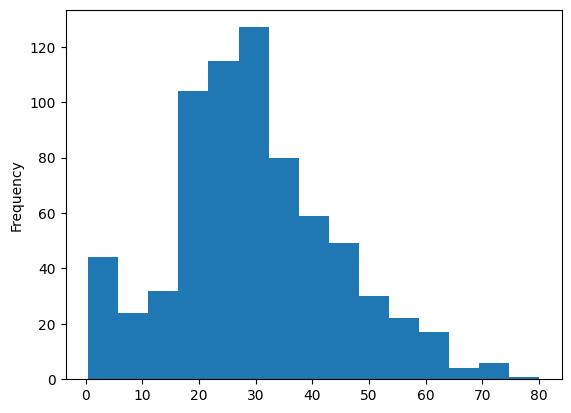

In [325]:
base.Age.plot.hist(bins = 15) #Verificando a distribuição de idade

##Tratando os Dados da base

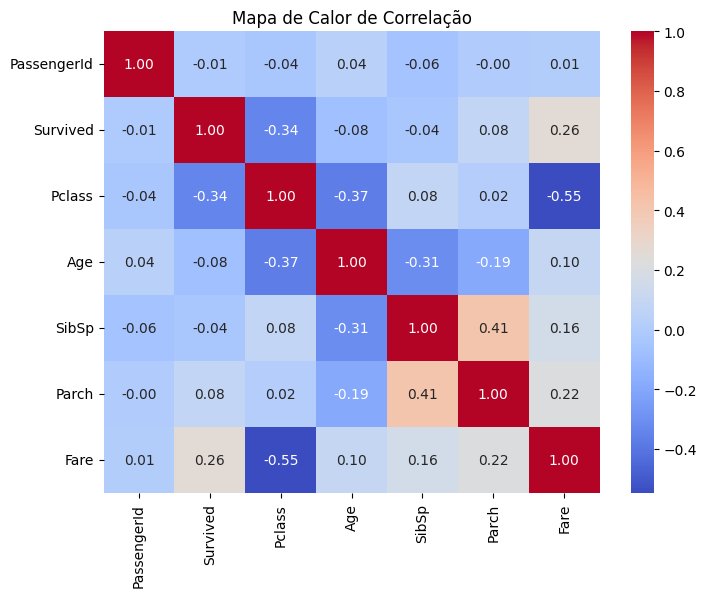

In [326]:
plt.figure(figsize=(8, 6))  ## vamos substituir os valores faltantes da coluna age por uma imputação multivariada
sns.heatmap(base.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f") ## utilizando o gráfico, localizaremos qual dos atributos possui maior correlação coma  variável
plt.title('Mapa de Calor de Correlação') ## assim, agruparemos os valores de idade por determinado atributo para fazer os tratamento dos dados
plt.show()

In [327]:
base['Age'] = base.Age.fillna(base.groupby(['Pclass'])['Age'].transform('median'))  ## utilizando a imputação multivariada para lidar com os valores vazios da coluna Age através da correlação negativa que esta coluna tem com o atributo Pclass

In [328]:
base['Age'] = base['Age'].astype(np.int64) ## coluna Age convertida para números inteiros

In [329]:
base.loc[base.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


In [330]:
base.loc[base['PassengerId'] == 62, 'Embarked'] = 'S'  ## inserindo a informação faltante com base nos registros históricos dos passageiros
base.loc[base['PassengerId'] == 830, 'Embarked'] = 'S' ## Por tratarem-se de poucos dados ausentes neste atributo, fiz a busca manual e os inseri na base
## Ambas embarcaram em Southampton

Link da biografia das passageiras que tiveram o tratamento em seus registros:

https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html ||
https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html

In [331]:
base.drop(columns = 'Cabin', inplace = True)  ## eliminando a coluna cabin por possuir muitos dados faltantes e não possuir impacto considerável na análise

##Anonimização dos dados


In [332]:
an = anonymize(base)

In [333]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [334]:
base = an.fake_names('Name') ## anonimizando os nomes dos passageiros na base de dados objetivando manter a privacidade destas informações
base.drop(columns = 'Name', inplace = True)  ## retirando a anyiga coluna contendo os nomes reais dos passageiros
base.rename(columns = {'Fake_Name':'Name'}, inplace = True)  ## renomeando a nova coluna de nomes
base = base.iloc[:,[0,10,3,4,2,5,6,7,8,9,1]] ## reorganizando o dataframe
base.head()

,PassengerId,Name,Sex,Age,Pclass,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,Lauren Cox-Barlow,male,22,3,1,0,A/5 21171,7.2500,S,0
1,2,Dr Sophie Turner,female,38,1,1,0,PC 17599,71.2833,C,1
2,3,Carole Wilson,female,26,3,0,0,STON/O2. 3101282,7.9250,S,1
3,4,Dr Leon Brown,female,35,1,1,0,113803,53.1000,S,1
4,5,Natasha Preston,male,35,3,0,0,373450,8.0500,S,0


In [335]:
base = an.fake_categories('Ticket') ## anonimizando os tickets dos passageiros na base de dados objetivando manter a privacidade destas informações
base.drop(columns = 'Ticket', inplace = True)  ## retirando a antiga coluna contendo os tickets reais dos passageiros
base.rename(columns = {'Fake_Ticket':'Ticket'}, inplace = True)  ## renomeando a nova coluna de tickets
base.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket
0,1,0,3,male,22,1,0,7.2500,S,Lauren Cox-Barlow,Ticket 1
1,2,1,1,female,38,1,0,71.2833,C,Dr Sophie Turner,Ticket 2
2,3,1,3,female,26,0,0,7.9250,S,Carole Wilson,Ticket 3
3,4,1,1,female,35,1,0,53.1000,S,Dr Leon Brown,Ticket 4
4,5,0,3,male,35,0,0,8.0500,S,Natasha Preston,Ticket 5


##Normalização dos dados

In [337]:
scaler_age = StandardScaler() ## assumindo que o atributo age possui razoável simetria (aproxiamadamente normal por trata-se de idades), será utiliza a standardização.

In [339]:
base['Age_escaled'] = scaler_age.fit_transform(base[['Age']])  ## aplicando o standard scaler a base padrão

In [342]:
base.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Age_escaled
0,1,0,3,male,22,1,0,7.2500,S,Lauren Cox-Barlow,Ticket 1,-0.532310
1,2,1,1,female,38,1,0,71.2833,C,Dr Sophie Turner,Ticket 2,0.675683
2,3,1,3,female,26,0,0,7.9250,S,Carole Wilson,Ticket 3,-0.230312


In [346]:
scaler_fare = MinMaxScaler() ## Por possuir outliers e ser assimétrica, o standardscaler não performaria muito bem. Assim, ao utilizarmos o MinMaxScaler, garantimos que todos os valores estejam no intervalo [0,1]

In [347]:
base['fare_scaled'] = scaler_fare.fit_transform(base[['Fare']])  ## aplicando o standard scaler a base padrão

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name,Ticket,Age_escaled,fare_scaled
0,1,0,3,male,22,1,0,7.2500,S,Lauren Cox-Barlow,Ticket 1,-0.532310,0.014151
1,2,1,1,female,38,1,0,71.2833,C,Dr Sophie Turner,Ticket 2,0.675683,0.139136
2,3,1,3,female,26,0,0,7.9250,S,Carole Wilson,Ticket 3,-0.230312,0.015469
3,4,1,1,female,35,1,0,53.1000,S,Dr Leon Brown,Ticket 4,0.449184,0.103644
4,5,0,3,male,35,0,0,8.0500,S,Natasha Preston,Ticket 5,0.449184,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,S,Mitchell James-Hawkins,Ticket 678,-0.154812,0.025374
887,888,1,1,female,19,0,0,30.0000,S,David Smith-Pratt,Ticket 679,-0.758809,0.058556
888,889,0,3,female,24,1,2,23.4500,S,Judith Edwards,Ticket 615,-0.381311,0.045771
889,890,1,1,male,26,0,0,30.0000,C,Patrick Hewitt,Ticket 680,-0.230312,0.058556
